# lab assignment #2: SNS Scraping
- Gather Twitter data regarding a topic of your own interest and perform the same exploration as the guide.
- Gather tweets of 5 Twitter users and perform the same exploration as the guide.

I wanted to see the tweets that contained the keyword: "k-pop"? 
I can do this with the same procedure as how we gathered tweets with the trending topics. 

first, I have gathered 100 tweets. 

In [113]:
searched_2 = twitter_api.search.tweets(q='k-pop', count=100)

In the variable "searched_2", I gathered recent tweets that contain the keyword, "k-pop". I did the same procedure in class, gathering the tweets and their corresponding metadata for further analysis. 

In [114]:
# storing the tweets and their info into statuses_2 variable
statuses_2 = searched_2['statuses']

In [115]:
len(statuses_2)

100

I have gathered 100 tweets.

In [116]:
status_texts_2 = [status['text'] for status in statuses_2]

screen_names_2 = [user_mention['screen_name']
               for status in statuses_2
                   for user_mention in status['entities']['user_mentions']]

hashtags_2 = [hashtag['text'] for status in statuses_2
               for hashtag in status['entities']['hashtags']]

In [117]:
len(status_texts_2), len(screen_names_2), len(hashtags_2)

(100, 124, 78)

In [118]:
# print(status_texts_2)
# print(screen_names_2)
# print(hashtags_2)

Now, I have gathered the tweets containing the terms "k-pop", and I have extracted the tweets, their user names, and their hashtags. For the next section, to make the computations easier, we will focus only on the first 10 tweets gathered. 

In [151]:
status = status_texts_2[:]
len(status)

100

In [152]:
status

['RT @eidolon_journal: "It’s a peculiar kind of racism: you hear that you don’t exist, so you erase yourself to make your identity align with…',
 'RT @BLACKPINK: The world-famous K-POP girl group BLACKPINK brings you a chic and stylish theme!  \n\nlink: https://t.co/2YX8lgNYZk\n\n#YG #BLAC…',
 'RT @kpopidol_en: 2020 AAA online Ticket Lucky Draw\n🌟Hashtag Event🌟\n\nDuration:\nOct 23~ Nov 5\n\nHow to join?\nFollow + RT\n\n📲Retweet Format:\nMy…',
 '멤버 승관은 지난달\xa08일과 지난\xa028일 두 차례에 걸쳐\xa0‘We Remember K-pop’이라는 제목의 브이 라이브를 진행해 추억의 노래를 들으면서 예능돌 다운 탁월한 진행 능력과 방대한\xa0K POP\xa0지식을… https://t.co/HxhFSEjyDP',
 'RT @DRKang817: #닉쿤 #Nichkhun #2PM\nK-pop 스타 및 배우\xa0닉쿤Nichkhun이\xa0실화를 바탕으로 한 로맨틱코미디 영화 &lt;홍콩 러브 스토리&gt;에\xa0출연 할 예정이다.\n\nhttps://t.co/ei8qfcg8nz https://t…',
 'My favorite K-pop song : Walk On Memories by @weareoneEXO \nRecommender : Shin Nami\n#CHOEAEDOL #KPOPRANKING #2020AAA https://t.co/kBpgoJUGUy',
 "RT @BLINKonSpotify: .@BLACKPINK and @selenagomez's 'Ice Cream' has surpassed 'POP/

## Text Vectorisation

Since i have now gathered the tweets according to some query that i want, i can now perform text vectorisation methods to quantify the texts. The words in the text will be encoded as integers or floating point values for use as input. By quantifying the texts, i can make them into usable features for further analysis, such as machine learning usage. 

i will take a look at 2 common methods of vectorisation: Count Vectorisation and TF-IDF Vectorisation. 

### Count Vectorisation

Count vectorising refers to a method of tokenising a collection of text documents and building a vocabulary of known words while encoding new documents using that vocabulary built. 

The method of creation is as follows: 

1. Create an instance of the CountVectorizer class
2. Call the fit() function in order to learn a vocabulary from one or more documents
3. Call the transform() function on one or more documents as needed to encode each as a vector

An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document. 

In [153]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(status)

print(vectorizer.get_feature_names())

['05am', '11', '12', '13b6chu6pw', '18b5waxpyb', '1effabaekhyun', '20', '201030', '2020', '2020aaa', '23', '28일', '2pm', '2yx8lgnyzk', '3amkst', '438', '4pm', '5400usd', '5ecretnumber', '5시', '6pm', '6시', '81_allie', '83zc6i5t', '8일과', '9r5x3pxees', 'a3g50lv4db', 'aaa', 'aabirah', 'about', 'admiración', 'again', 'ai', 'alam', 'align', 'all', 'also', 'always', 'ambassador', 'and', 'are', 'area', 'article', 'artist', 'as', 'at', 'ateez', 'ateezofficial', 'attention', 'atz', 'au', 'award', 'awards', 'ba', 'baekhyun', 'band', 'bands', 'barbie', 'be', 'become', 'behind', 'being', 'bersama', 'best', 'blac', 'blackp', 'blackpi', 'blackpink', 'blinkonspotify', 'boyz', 'brand', 'brings', 'broadcasted', 'bts', 'bungee', 'busy', 'by', 'call', 'called', 'can', 'cat', 'categories', 'caught', 'cdのご予約も受付中です', 'cg32em2b00', 'chaeutopia', 'challenging', 'channel', 'charmingship', 'chic', 'choeaedol', 'choice', 'co', 'come', 'commercial', 'compa', 'completely', 'con', 'concert', 'consiguiendo', 'content

The result shows the representing words that are included in all the tweets. We can transform this into an array to make this into numerical data. The numerical data simply shows how many times a certain word has appeared in each text (tweet). 

In [154]:
# print(x.toarray())

- 0 refers to the word not being present in the text, and 1 refers to the word being present in the text. This data can now be used as a feature to be used as an input for machine learning or other analytical purposes. 

### TF-IDF Vectorizer

Using CountVectorizer is very simple but may be too simple for usage. For example, some words like "the" might appear many times and their counts may not be meaningful in the encoded vectors. Therefore, the more popular method of calculating word frequencies is TF-IDF (Term Frequency-Inverse Document Frequency) 

* Term frequency: summarises how often a given word appears within a document
* Inverse document frequency: downscales words that appear a lot across documents

Basically, TF-IDF are word frequency scores that try to highlight words that are more interesting. 

TfidfVectorizer will tokenise documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. The flow of usage is basically the same as CountVectorizer. 

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer()

# tokenise and build vocab
vectorizer.fit(status)
vector = vectorizer.transform(status)

In [157]:
print(vector.shape)

(100, 637)


We get the TF-IDF score for each word that is normalised to values between 0 and 1. This encoded document vector can now be used directly as features for most of machine learning problems. 

## Word Cloud

i can also visualise the commonly appearing terms in the document. Using the latest 10 tweets that we have prepared, let us create a Word Cloud. 

In [160]:
# combine all strings in the list into one string
status_text = ', '.join(status)

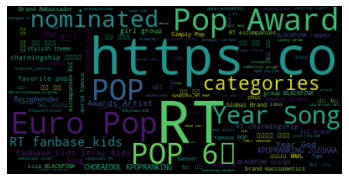

In [161]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud().generate(status_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

With bigger text document, i can get more interesting word clouds.

## Accessing User Information

By accessing user information, we can gain useful information such as:
   
1. Location
2. Follower count
3. Date of creation
4. Number of tweets

And many more. 

### Getting User Information

Using **users.lookup(screen_name= )**, we can access a user's information. In the argument "screen_name", we have to input the Twitter ID name that we want to access. The Twitter ID name is the name in the form of "@SocialWebMining", where the @ signifies that it is an ID. The output is a nested dictionary in a list, requiring careful navigation. 

In [211]:
account_1 = twitter_api.users.lookup(screen_name='BLACKPINK')
account_2 = twitter_api.users.lookup(screen_name='BTS_twt')
account_3 = twitter_api.users.lookup(screen_name='Trump')
account_4 = twitter_api.users.lookup(screen_name='ArianaGrande')
account_5 = twitter_api.users.lookup(screen_name='BillGates')

In [209]:
print(account_1)

[{'id': 1273850774380883975, 'id_str': '1273850774380883975', 'name': 'BLACKPINKOFFICIAL', 'screen_name': 'BLACKPINK', 'location': '', 'description': 'BLΛƆKPIИK', 'url': 'https://t.co/mhaOteBGUV', 'entities': {'url': {'urls': [{'url': 'https://t.co/mhaOteBGUV', 'expanded_url': 'https://youtu.be/dyRsYk0LyA8', 'display_url': 'youtu.be/dyRsYk0LyA8', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 2394402, 'friends_count': 0, 'listed_count': 3094, 'created_at': 'Fri Jun 19 05:32:29 +0000 2020', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 182, 'lang': None, 'status': {'created_at': 'Thu Oct 29 02:00:00 +0000 2020', 'id': 1321632849712263173, 'id_str': '1321632849712263173', 'text': 'The world-famous K-POP girl group BLACKPINK brings you a chic and stylish theme!  \n\nlink: https://t.co/2YX8lgNYZk… https://t.co/a2xa7M9REY', 'truncated': True, 'entities': {'hashtags': [], 's

In [212]:
print(account_2)

[{'id': 335141638, 'id_str': '335141638', 'name': '방탄소년단', 'screen_name': 'BTS_twt', 'location': '', 'description': 'Hi! We are BTS!!', 'url': 'https://t.co/BP579N8Xkk', 'entities': {'url': {'urls': [{'url': 'https://t.co/BP579N8Xkk', 'expanded_url': 'http://btsblog.ibighit.com', 'display_url': 'btsblog.ibighit.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 30303430, 'friends_count': 142, 'listed_count': 74266, 'created_at': 'Thu Jul 14 06:32:56 +0000 2011', 'favourites_count': 211, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 12423, 'lang': None, 'status': {'created_at': 'Fri Oct 30 09:10:14 +0000 2020', 'id': 1322103508485644289, 'id_str': '1322103508485644289', 'text': '가을 🍂🍁 https://t.co/yrBWNedWd9', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1322103430769303552, 'id_str': '1322103430769303552', 'indices': [6, 2

In [213]:
print(account_3)

[{'id': 720293443260456960, 'id_str': '720293443260456960', 'name': 'The Trump Organization', 'screen_name': 'Trump', 'location': 'New York, NY', 'description': 'Official Twitter page of The @Trump Organization. The most globally recognized brand in luxury real estate, golf, hospitality, and entertainment.', 'url': 'https://t.co/L8emHxSDPh', 'entities': {'url': {'urls': [{'url': 'https://t.co/L8emHxSDPh', 'expanded_url': 'http://Trump.com', 'display_url': 'Trump.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 523227, 'friends_count': 50, 'listed_count': 1486, 'created_at': 'Wed Apr 13 16:51:54 +0000 2016', 'favourites_count': 8006, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 884, 'lang': None, 'status': {'created_at': 'Thu Oct 29 17:31:38 +0000 2020', 'id': 1321867301969403904, 'id_str': '1321867301969403904', 'text': 'Rising 68 stories above 5th Avenue, @TrumpTower has remained one of

In [215]:
print(account_4)

[{'id': 34507480, 'id_str': '34507480', 'name': 'Ariana Grande', 'screen_name': 'ArianaGrande', 'location': 'ǝʌɐ uooɯʎǝuoɥ', 'description': 'positions', 'url': 'https://t.co/ekrq257KgI', 'entities': {'url': {'urls': [{'url': 'https://t.co/ekrq257KgI', 'expanded_url': 'https://arianagrande.lnk.to/positions', 'display_url': 'arianagrande.lnk.to/positions', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 78221604, 'friends_count': 57718, 'listed_count': 53815, 'created_at': 'Thu Apr 23 02:56:31 +0000 2009', 'favourites_count': 44402, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 46682, 'lang': None, 'status': {'created_at': 'Fri Oct 30 04:00:36 +0000 2020', 'id': 1322025587368742912, 'id_str': '1322025587368742912', 'text': '🤍 positions (the album) is out now 🤍 https://t.co/FpkiHYLFqt https://t.co/J33o6KMTmo', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], '

In [216]:
print(account_5)

[{'id': 50393960, 'id_str': '50393960', 'name': 'Bill Gates', 'screen_name': 'BillGates', 'location': 'Seattle, WA', 'description': "Sharing things I'm learning through my foundation work and other interests.", 'url': 'https://t.co/emd1hfqSRD', 'entities': {'url': {'urls': [{'url': 'https://t.co/emd1hfqSRD', 'expanded_url': 'https://gatesnot.es/blog', 'display_url': 'gatesnot.es/blog', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 52406538, 'friends_count': 240, 'listed_count': 119767, 'created_at': 'Wed Jun 24 18:44:10 +0000 2009', 'favourites_count': 142, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 3404, 'lang': None, 'status': {'created_at': 'Wed Oct 28 20:07:52 +0000 2020', 'id': 1321544230007758848, 'id_str': '1321544230007758848', 'text': "Here in Washington, we always vote by mail. It's a safe and secure way to shape the future of our country. But rega… https://t.co/wGSCJYxxY1", 't

I can now extract necessary information into variables of our choice. For example, let us extract the **name**, **description**, and **followers_count**. 

In [218]:
account_1[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [219]:
account_2[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [221]:
account_3[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [222]:
account_4[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [223]:
account_5[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [233]:
account_1_name = account_1[0]['name']

account_1_description = account_1[0]['description']

account_1_followers = account_1[0]['followers_count']


account_2_name = account_2[0]['name']

account_2_description = account_2[0]['description']

account_2_followers = account_2[0]['followers_count']


account_3_name = account_3[0]['name']

account_3_description = account_3[0]['description']

account_3_followers = account_3[0]['followers_count']


account_4_name = account_4[0]['name']

account_4_description = account_4[0]['description']

account_4_followers = account_4[0]['followers_count']


account_5_name = account_5[0]['name']

account_5_description = account_5[0]['description']

account_5_followers = account_5[0]['followers_count']

In [234]:
print(account_1_name)
print(account_1_description)
print(account_1_followers)

BLACKPINKOFFICIAL
BLΛƆKPIИK
2394279


In [235]:
print(account_2_name)
print(account_2_description)
print(account_2_followers)

방탄소년단
Hi! We are BTS!!
30303430


In [236]:
print(account_3_name)
print(account_3_description)
print(account_3_followers)

The Trump Organization
Official Twitter page of The @Trump Organization. The most globally recognized brand in luxury real estate, golf, hospitality, and entertainment.
523227


In [237]:
print(account_4_name)
print(account_4_description)
print(account_4_followers)

Ariana Grande
positions
78221604


In [238]:
print(account_5_name)
print(account_5_description)
print(account_5_followers)

Bill Gates
Sharing things I'm learning through my foundation work and other interests.
52406538


### Getting User's Tweets

Getting a user's information is good, but it would be much better to get the tweets of a user. Fortunately, the Twitter API provides such function: **statuses.user_timeline(screen_name= , count= )**

In [240]:
user_tweets_1 = twitter_api.statuses.user_timeline(screen_name='BLACKPINK', count=100)
user_tweets_2 = twitter_api.statuses.user_timeline(screen_name='BTS_twt', count=100)
user_tweets_3 = twitter_api.statuses.user_timeline(screen_name='Trump', count=100)
user_tweets_4 = twitter_api.statuses.user_timeline(screen_name='ArianaGrande', count=100)
user_tweets_5 = twitter_api.statuses.user_timeline(screen_name='BillGates', count=100)

In [242]:
print(user_tweets_1)

[{'created_at': 'Thu Oct 29 02:00:00 +0000 2020', 'id': 1321632849712263173, 'id_str': '1321632849712263173', 'text': 'The world-famous K-POP girl group BLACKPINK brings you a chic and stylish theme!  \n\nlink: https://t.co/2YX8lgNYZk… https://t.co/a2xa7M9REY', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/2YX8lgNYZk', 'expanded_url': 'https://bit.ly/3kESJ6U', 'display_url': 'bit.ly/3kESJ6U', 'indices': [90, 113]}, {'url': 'https://t.co/a2xa7M9REY', 'expanded_url': 'https://twitter.com/i/web/status/1321632849712263173', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [115, 138]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1273850774380883975, 'id_str': '1273850774380883975', 'name': 'BLACKPINK

In [243]:
print(user_tweets_2)

[{'created_at': 'Fri Oct 30 09:10:14 +0000 2020', 'id': 1322103508485644289, 'id_str': '1322103508485644289', 'text': '가을 🍂🍁 https://t.co/yrBWNedWd9', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1322103430769303552, 'id_str': '1322103430769303552', 'indices': [6, 29], 'media_url': 'http://pbs.twimg.com/media/ElkOEMNUYAAWNkB.jpg', 'media_url_https': 'https://pbs.twimg.com/media/ElkOEMNUYAAWNkB.jpg', 'url': 'https://t.co/yrBWNedWd9', 'display_url': 'pic.twitter.com/yrBWNedWd9', 'expanded_url': 'https://twitter.com/BTS_twt/status/1322103508485644289/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}, 'medium': {'w': 900, 'h': 1200, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 1322103430769303552, 'id_str': '1322103430769303552', 'indices': [6, 29], 'media_url': 'http://pbs.t

In [244]:
print(user_tweets_3)

[{'created_at': 'Thu Oct 29 17:31:38 +0000 2020', 'id': 1321867301969403904, 'id_str': '1321867301969403904', 'text': 'Rising 68 stories above 5th Avenue, @TrumpTower has remained one of New York’s most iconic properties since its com… https://t.co/5R3V0rjl81', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TrumpTower', 'name': 'Trump Tower New York', 'id': 835721828, 'id_str': '835721828', 'indices': [36, 47]}], 'urls': [{'url': 'https://t.co/5R3V0rjl81', 'expanded_url': 'https://twitter.com/i/web/status/1321867301969403904', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 720293443260456960, 'id_str': '720293443260456960', 'name': 'The Trump O

In [245]:
print(user_tweets_4)

[{'created_at': 'Fri Oct 30 04:00:36 +0000 2020', 'id': 1322025587368742912, 'id_str': '1322025587368742912', 'text': '🤍 positions (the album) is out now 🤍 https://t.co/FpkiHYLFqt https://t.co/J33o6KMTmo', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/FpkiHYLFqt', 'expanded_url': 'https://arianagrande.lnk.to/positions', 'display_url': 'arianagrande.lnk.to/positions', 'indices': [37, 60]}], 'media': [{'id': 1322025582310416385, 'id_str': '1322025582310416385', 'indices': [61, 84], 'media_url': 'http://pbs.twimg.com/media/EljHQ0GXYAE8Y6l.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EljHQ0GXYAE8Y6l.jpg', 'url': 'https://t.co/J33o6KMTmo', 'display_url': 'pic.twitter.com/J33o6KMTmo', 'expanded_url': 'https://twitter.com/ArianaGrande/status/1322025587368742912/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 675, 'resize': 'fit'}, 'large': {'w': 1242, '

In [246]:
print(user_tweets_5)

[{'created_at': 'Wed Oct 28 20:07:52 +0000 2020', 'id': 1321544230007758848, 'id_str': '1321544230007758848', 'text': "Here in Washington, we always vote by mail. It's a safe and secure way to shape the future of our country. But rega… https://t.co/wGSCJYxxY1", 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/wGSCJYxxY1', 'expanded_url': 'https://twitter.com/i/web/status/1321544230007758848', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 50393960, 'id_str': '50393960', 'name': 'Bill Gates', 'screen_name': 'BillGates', 'location': 'Seattle, WA', 'description': "Sharing things I'm learning through my foundation work and other interests.", 'u

In [247]:
len(user_tweets_1)

100

In [248]:
len(user_tweets_2)

100

In [249]:
len(user_tweets_3)

100

In [250]:
len(user_tweets_4)

100

In [251]:
len(user_tweets_5)

100

I have gathered latest 100 tweets of  5 people. In a list, there are 100 dictionaries, each dictionary containing the tweet and its corresponding information. I can do similar methods to extract the necessary information. We will now try to extract 100 tweets of 5 people.

I will first try to navigate through the data structure and print out the latest 100 tweets. 

In [252]:
for i in range(100):
    print()
    print(user_tweets_1[i]['text'])


The world-famous K-POP girl group BLACKPINK brings you a chic and stylish theme!  

link: https://t.co/2YX8lgNYZk… https://t.co/a2xa7M9REY

RT @SuperStar_YG: First news!
#SuperStarYG pre-register begins today!

Spread the words!

☞https://t.co/nm6PzIKkzi
#SECHSKIES #BIGBANG #AKM…

Do you find yourself humming 'Lovesick Girls' like I do? 🎧  
Get the iconic new BLACKPINK looks, and let's dance! 🖤… https://t.co/6Z9rCryzme

RT @SuperStar_YG: [SuperStar YG] #blackpink in your area!
#BLACKPINK with the pre-register news!

3 winners among the retweets will get [Si…

Thank you so much BLINKs 🖤
lovesick girls so full with love https://t.co/2nUPsuAEpN

RT @ygent_official: #BLACKPINK 'Lovesick Girls' M/V HITS 200 MILLION VIEWS @Youtube
BLINKs worldwide, thank you so much!

'Lovesick Girls'…

RT @ygent_official: #BLACKPINK '24/365 with BLACKPINK' EP.16

🎬 https://t.co/3k2SYyoPp0

#블랙핑크 #JISOO #JENNIE #ROSÉ #LISA #24_365_WITH_BLAC…

RT @netflix: OK, it’s the final BLACKPINK DELETED SCENE 😢  (I kno

In [253]:
for i in range(100):
    print()
    print(user_tweets_2[i]['text'])


가을 🍂🍁 https://t.co/yrBWNedWd9

아들아.. 😚 https://t.co/keC3kBI8PJ

😙민트홉😉 https://t.co/w15y02UYuO

쁘이 https://t.co/snSDy1qKEP

많이 쌀쌀해졌어요 감기 조심하시구😄💜앨범 기대 많이 해주세용 https://t.co/GhLNhitBKi

@conangray @lauvsongs and lauv👍

@conangray @lauvsongs conan😆😆

석지니 https://t.co/7fShlpQpe5

RT @billboard: The fans have voted, @BTS_twt takes home Top Social Artist at the #BBMAs

Check out the complete winners list, updating live…

RT @BBMAs: Congratulations to @BTS_twt on winning Top Social Artist! #BTSxBBMAs https://t.co/1FzuMZCF17

RT @billboardcharts: The #Hot100 top 10 (chart dated Oct. 17, 2020) https://t.co/ARdZjg4hBw

지민아 생일ㅊㅊㅊㅊㅋㅋㅋㅋㅋㅋ
#지민생일ㅊㅋ
#냠쥰이형이야 https://t.co/TQdLIxG5hJ

https://t.co/oUIUIUEC33

뽀나스 💜😂
#HappyJiminDay https://t.co/wfUGj6nCiV

항상 건강하고 행복하자 🤩😚💜
#HappyJiminDay https://t.co/zZy6AB63ks

생일 축하해 🎉😚💜
#HappyJiminDay https://t.co/VLniUrqHrw

찌미나 
#HappyJiminDay https://t.co/axlzotgKpp

대체불가는 왜 적은 거임
#JIMIN

생일 축하해주셔서 감사합니다
여러분도 행복한 하루 되세요 😄

조만간 브이앱으로 찾아 뵐게요!
#JIMIN https://t.co/dUBU9N

In [254]:
for i in range(100):
    print()
    print(user_tweets_3[i]['text'])


Rising 68 stories above 5th Avenue, @TrumpTower has remained one of New York’s most iconic properties since its com… https://t.co/5R3V0rjl81

An enchanting spa treatment awaits you just beyond the lush garden entrance to The Spa at @TrumpDoral.… https://t.co/rrjaEonH6s

Revel in this majestic scene of the iconic @TrumpTurnberry Lighthouse, a true Trump Treasure and stunning landmark… https://t.co/npIymBk2tZ

Step away from the bustling city streets and into your escape at Trump Park Avenue, a landmarked architectural wond… https://t.co/UDyZCrURdF

Our story began more than four decades ago with one fearless leader. Today, that leadership continues under… https://t.co/V8yAdpn1ya

RT @TrumpGolf: Happy #NationalBossDay to the leaders of our Trump Golf family, @EricTrump and @DonaldJTrumpJr! https://t.co/JUBaZQZQUS

This @TrumpChicago Tower is crafted entirely of chocolate, and you would never know. #DessertDay https://t.co/V3DRoGm1hW

Every year, we fall in love with fall all over again.

In [255]:
for i in range(100):
    print()
    print(user_tweets_4[i]['text'])


🤍 positions (the album) is out now 🤍 https://t.co/FpkiHYLFqt https://t.co/J33o6KMTmo

one

🤍

three hours

what’s ya motive https://t.co/06uEAHg72I

crying https://t.co/5AUfNqD0Sb

i came to peace with my path 🤍 
now u got me off track

🤍🤍🤍 https://t.co/v8ijdXvFHl

🥺🤍

down like sunsets
down like my head on your chest

tonight 🤍 https://t.co/dLl4h486oL

hellooo ! can it be tomorrow night already please ! love u so much i am so so grateful and excited. can’t stop cryi… https://t.co/EEANfVPuI4

🤍 https://t.co/qNum5a3Kz6 https://t.co/heRnQUkPVY

i’ve been so excited to show u these !!! three (slightly) different versions of the physical albums are now availab… https://t.co/2jre9aqaEr

🤍 https://t.co/9Z5SPqYSqU

happy positions week 🤍

positions behind the scenes out now by @alfredoflores https://t.co/ifdH0TP6vz

RT @TeamAriana: positions on @iTunes 
https://t.co/t9ymcNZfCO

🤍 https://t.co/qNum5a3Kz6 https://t.co/WFalDTREGu

@arianacuIture :) 🤍

@tattoosmilee 🥺🤍

@needyenough no

@skyhigh

In [256]:
for i in range(100):
    print()
    print(user_tweets_5[i]['text'])


Here in Washington, we always vote by mail. It's a safe and secure way to shape the future of our country. But rega… https://t.co/wGSCJYxxY1

@MohamedBinZayed The UAE is an essential partner in stopping polio in Pakistan. Thank you @MohamedBinZayed for your… https://t.co/5xQEZ8CpUL

For decades, @Rotary has worked tirelessly to #EndPolio. Today, the health infrastructure they’ve built around the… https://t.co/vYYV7djNsE

RT @StephenCurry30: Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

I’ve been working for some time on a book about what we need to do over the next decade to avoid a climate disaster… https://t.co/UvV6cRjxOW

It’s inspiring to see so much passion these days for dealing with climate change, and to know that the world has se… https://t.co/9F4HMYnG3m

India’s research and manufacturing capacity are critical for fighting COVID-19. Thank you @narendramodi for speakin… https://t.co/6tXltL7gAr

Europe

Now, we will save all of Elon Musk's tweets into a variable since we know now how to navigate through the data structure. 

In [257]:
user_texts_1 = [status['text'] for status in user_tweets_1]
user_texts_2 = [status['text'] for status in user_tweets_2]
user_texts_3 = [status['text'] for status in user_tweets_3]
user_texts_4 = [status['text'] for status in user_tweets_4]
user_texts_5 = [status['text'] for status in user_tweets_5]

In [258]:
len(user_texts_1)

100

In [259]:
len(user_texts_2)

100

In [260]:
len(user_texts_3)

100

In [261]:
len(user_texts_4)

100

In [262]:
len(user_texts_5)

100

I will use 100 tweets.

In [270]:
user_1 = user_texts_1[:]
user_2 = user_texts_2[:]
user_3 = user_texts_3[:]
user_4 = user_texts_4[:]
user_5 = user_texts_5[:]

len(user_1)

100

In [271]:
len(user_2)

100

In [272]:
len(user_3)

100

In [273]:
len(user_4)

100

In [274]:
len(user_5)

100

In [275]:
# user

### Vectoriser with User Tweets

Same as before, we can try vectorising 5 people's tweets using Count Vectoriser, TF-IDF Vectoriser, and visualising through Word Cloud. 

#### Count Vectoriser

In [284]:
vectorizer = CountVectorizer()
x1 = vectorizer.fit_transform(user_1)
print(vectorizer.get_feature_names())

['0n4d9kyziv', '0vhbhnsmxa', '10', '100', '10월', '11', '12', '13', '14', '14일', '15', '16', '16dhpksevv', '1lausxcxka', '1st', '1stfullalbum', '1시', '200', '2020', '20201001_9pmest', '20201002_10amkst', '20201002_12amest', '20201002_1pmkst', '20201021_7pmkst', '21', '21st', '24', '24_365_with_blac', '24_365_with_black', '2nupsuaepn', '2pm', '2pzri1aan4', '2vodjg5ohf', '2yx8lgnyzk', '300', '365', '3k2syyopp0', '3p1ptf36ph', '3vraz7ne8r', '3시간', '45pm', '4bf1vuyexj', '4na3g2xcu1', '4zutdzlrik', '54sfpin48y', '55xbhayvvf', '5ayipx5c8d', '5pyagfntjo', '5usbdognet', '600', '6z9rcryzme', '7pm', '83xa8qifvy', '8am', '8dxg5e1jbk', '8qvf5w5pjz', '8urvoyagqh', '95zxwukmbh', '9rxlanbjae', '9vlyv4cjbx', 'a0l1hox3l8', 'a2xa7m9rey', 'abc', 'abeepnypn3', 'about', 'ac5svx5x8j', 'akm', 'album', 'all', 'always', 'amazonmusic', 'among', 'amp', 'and', 'answer', 'apple', 'applemusic', 'are', 'area', 'around', 'arrived', 'artists', 'ask_blackpink', 'association', 'at', 'available', 'b8cvfbab09', 'ba5mieulgt

In [285]:
vectorizer = CountVectorizer()
x2 = vectorizer.fit_transform(user_2)
print(vectorizer.get_feature_names())

['0p3zmmhqiz', '10', '100', '13d7f0dams', '17', '1cye8hvvln', '1fzumzcf17', '1위', '1위도', '2020', '24살', '32nbqh9p3p', '3tgoza6tbb', '4kvk7wjo6j', '4u7bcps1i3', '6ciqy7ygov', '7fshlpqpe5', '7ujelmksgi', '80vzv4ig19', '8k8c9qogbe', '90ngdjrf12', '9hnj7yduob', '9yuiwdqjf4', 'a5ufai6yyv', 'again', 'ago', 'agt', 'along', 'amp', 'and', 'ap4nb0ohy3', 'apma', 'ardzjg4hbw', 'army', 'artist', 'at', 'avjfn6mkad', 'axlzotgkpp', 'bbac5oqo26', 'bbmas', 'billboard', 'billboardcharts', 'birthday', 'bjgrcgrobf', 'blueberry', 'bring', 'bssot99oqn', 'bts', 'bts_bighit', 'bts_dynamite', 'bts_twt', 'btsonagt', 'btsxbbmas', 'buhcysbhzn', 'bvmvibuuhe', 'by', 'chart', 'check', 'cheongo', 'ciou1xhat3', 'cl36bfzpqz', 'cmnbks8yo2', 'co', 'come', 'complete', 'conan', 'conangray', 'congratulations', 'crowd', 'cup', 'cutqup6oaa', 'dated', 'day', 'djou9nw4xr', 'do', 'down', 'dream', 'dubu9nwhzo', 'dy9ladqaqr', 'dynamite', 'dynamitebts', 'dynamite많이', 'egt2aftwu4', 'ewl7gnw0ya', 'eyes', 'fans', 'feat', 'friend', 'fv0

In [286]:
vectorizer = CountVectorizer()
x3 = vectorizer.fit_transform(user_3)
print(vectorizer.get_feature_names())

['0f6qindcip', '101', '125', '13mjkm1tbz', '16', '18', '18th', '19', '2020', '2021', '23', '26th', '2tl8fuao2f', '3rd', '3sh67upirs', '4th', '50', '56sypql2n1', '57', '5r3v0rjl81', '5th', '630', '67p3d9gv', '68', '6kqnaumc9f', '72', '75', '7uq0hhi4gi', '92', 'aberdeen', 'above', 'access', 'accolades', 'across', 'activity', 'after', 'again', 'aged', 'ago', 'ailsa', 'albemarle', 'albemarleestate', 'all', 'always', 'am', 'amazed', 'amazi', 'amazing', 'ameni', 'america', 'among', 'amp', 'an', 'and', 'angeles', 'announce', 'annual', 'any', 'anything', 'anywhere', 'apart', 'archi', 'architectural', 'are', 'armed', 'arnoldpalmer', 'around', 'arrival', 'arxztmarru', 'as', 'at', 'autumn', 'avenue', 'await', 'awaits', 'award', 'awarded', 'awards', 'away', 'awe', 'b2bzli0prj', 'b_dechambeau', 'back', 'bar', 'battle', 'be', 'beautif', 'beautiful', 'been', 'began', 'beginning', 'begins', 'behalf', 'being', 'below', 'benefit', 'benjamin', 'best', 'better', 'beyond', 'blessed', 'blue', 'bluemonster',

In [287]:
vectorizer = CountVectorizer()
x4 = vectorizer.fit_transform(user_4)
print(vectorizer.get_feature_names())

['06ueahg72i', '10', '1zaxsdnqim', '23', '2ix9nbvsmo', '2jre9aqaer', '30', '30th', '3jzweyiaw4', '3yajoit5jc', '4knd5ifajs', '5aufnqd0sb', '5k9b4203pf', '5sr8fzi668', '69bkuoy8uo', '6th', '6wjdbyh4wf', '7dj55wcd5o', '7om4dapico', '7pm', '8p', '9kana5hobd', '9z5spqysqu', 'actually', 'adding', 'again', 'album', 'albums', 'alfredoflores', 'all', 'already', 'always', 'am', 'amp', 'an', 'and', 'answering', 'anything', 'applemusic', 'are', 'arianacuiture', 'arianagrande', 'arianashalo', 'arianators', 'as', 'ass', 'at', 'august', 'availab', 'available', 'b7ap6crrju', 'b7cu7iztsd', 'b9xtbjjfab', 'babes', 'babyimgrateful', 'back', 'bday', 'be', 'been', 'behind', 'being', 'best', 'blazed', 'blazedmarais', 'borderline', 'both', 'brb', 'break', 'breaths', 'bring', 'but', 'buteraexplicit', 'by', 'came', 'can', 'cd', 'chest', 'chromatica', 'co', 'congratulations', 'continued', 'cryi', 'crying', 'cutout', 'd41ltrhi2j', 'd41ltrytqt', 'd987rfzslo', 'dave', 'day', 'deadline', 'debate', 'deep', 'didn', '

In [288]:
vectorizer = CountVectorizer()
x5 = vectorizer.fit_transform(user_5)
print(vectorizer.get_feature_names())

['100', '17kz94c44u', '1865', '19', '1918', '20', '2000', '2020', '25', '3glwnkinli', '3rtm8wdl4y', '47', '4yikzuxrrz', '5xqez8cpul', '6txltl7gar', '88z3r8zjco', '89t7hmikfu', '8jddeb2ssd', '8nh2eultr4', '90th', '98rar7g9k4', '9cbxuamx77', '9f4hmyng3m', '9s9zlvlvfx', 'abeshinzo', 'able', 'about', 'access', 'across', 'actions', 'additional', 'address', 'advances', 'affected', 'affecting', 'affordable', 'africa', 'after', 'again', 'against', 'age', 'ago', 'ahmaud', 'aid', 'all', 'alni2zdcx6', 'alone', 'also', 'always', 'alz', 'alzheimer', 'am', 'amazing', 'america', 'amp', 'amy', 'an', 'and', 'answer', 'anti', 'antonioguterres', 'aoi5vsmflf', 'ap', 'approa', 'approach', 'arbery', 'are', 'areas', 'army', 'around', 'article', 'as', 'aside', 'asked', 'asking', 'ava', 'available', 'avoid', 'back', 'bangladesh', 'barackobama', 'barriers', 'barry', 'based', 'basketball', 'bay', 'be', 'beat', 'because', 'bed', 'bee', 'been', 'before', 'begin', 'behind', 'believe', 'believes', 'beloved', 'best',

In [289]:
print(x1.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [290]:
print(x2.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [291]:
print(x3.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [292]:
print(x4.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [293]:
print(x5.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


#### TF-IDF Vectoriser

In [294]:
vectorizer = TfidfVectorizer()

vectorizer.fit(user_1)

print(vectorizer.vocabulary_)

{'the': 366, 'world': 427, 'famous': 165, 'pop': 299, 'girl': 182, 'group': 189, 'blackpink': 96, 'brings': 104, 'you': 439, 'chic': 115, 'and': 73, 'stylish': 352, 'theme': 369, 'link': 238, 'https': 203, 'co': 116, '2yx8lgnyzk': 33, 'a2xa7m9rey': 61, 'rt': 326, 'superstar_yg': 354, 'first': 175, 'news': 268, 'superstaryg': 355, 'pre': 303, 'register': 318, 'begins': 91, 'today': 380, 'spread': 345, 'words': 426, 'nm6pzikkzi': 270, 'sechskies': 332, 'bigbang': 94, 'akm': 66, 'do': 144, 'find': 174, 'yourself': 441, 'humming': 204, 'lovesick': 247, 'girls': 183, 'like': 237, 'get': 181, 'iconic': 207, 'new': 266, 'looks': 245, 'let': 234, 'dance': 137, '6z9rcryzme': 50, 'superstar': 353, 'yg': 435, 'in': 210, 'your': 440, 'area': 78, 'with': 422, 'winners': 420, 'among': 71, 'retweets': 322, 'will': 418, 'si': 336, 'thank': 363, 'so': 339, 'much': 260, 'blinks': 101, 'full': 180, 'love': 246, '2nupsuaepn': 29, 'ygent_official': 436, 'hits': 199, '200': 17, 'million': 253, 'views': 400,

In [295]:
vectorizer = TfidfVectorizer()

vectorizer.fit(user_2)

print(vectorizer.vocabulary_)

{'가을': 239, 'https': 108, 'co': 62, 'yrbwnedwd9': 230, '아들아': 430, 'kec3kbi8pj': 126, '민트홉': 361, 'w15y02uyuo': 215, '쁘이': 391, 'snsdy1qkep': 185, '많이': 342, '쌀쌀해졌어요': 426, '감기': 240, '조심하시구': 518, '앨범': 446, '기대': 268, '해주세용': 576, 'ghlnhitbki': 94, 'conangray': 66, 'lauvsongs': 133, 'and': 29, 'lauv': 132, 'conan': 65, '석지니': 411, '7fshlpqpe5': 16, 'rt': 176, 'billboard': 40, 'the': 194, 'fans': 85, 'have': 101, 'voted': 213, 'bts_twt': 50, 'takes': 191, 'home': 104, 'top': 197, 'social': 186, 'artist': 34, 'at': 35, 'bbmas': 39, 'check': 57, 'out': 161, 'complete': 64, 'winners': 222, 'list': 135, 'updating': 204, 'live': 136, 'congratulations': 67, 'to': 196, 'on': 158, 'winning': 223, 'btsxbbmas': 52, '1fzumzcf17': 6, 'billboardcharts': 41, 'hot100': 106, '10': 1, 'chart': 56, 'dated': 71, 'oct': 155, '17': 4, '2020': 9, 'ardzjg4hbw': 32, '지민아': 538, '생일ㅊㅊㅊㅊㅋㅋㅋㅋㅋㅋ': 408, '지민생일ㅊㅋ': 537, '냠쥰이형이야': 293, 'tqdlixg5hj': 198, 'ouiuiuec33': 160, '뽀나스': 390, 'happyjiminday': 100, 'wfugj6nc

In [296]:
vectorizer = TfidfVectorizer()

vectorizer.fit(user_3)

print(vectorizer.vocabulary_)

{'rising': 547, '68': 23, 'stories': 600, 'above': 30, '5th': 20, 'avenue': 72, 'trumptower': 674, 'has': 293, 'remained': 532, 'one': 466, 'of': 457, 'new': 445, 'york': 762, 'most': 429, 'iconic': 320, 'properties': 508, 'since': 578, 'its': 347, 'com': 150, 'https': 318, 'co': 146, '5r3v0rjl81': 19, 'an': 52, 'enchanting': 212, 'spa': 583, 'treatment': 652, 'awaits': 74, 'you': 763, 'just': 355, 'beyond': 99, 'the': 628, 'lush': 400, 'garden': 266, 'entrance': 218, 'to': 639, 'at': 70, 'trumpdoral': 660, 'rrjaeonh6s': 550, 'revel': 544, 'in': 326, 'this': 633, 'majestic': 404, 'scene': 557, 'trumpturnberry': 676, 'lighthouse': 380, 'true': 654, 'trump': 655, 'treasure': 649, 'and': 53, 'stunning': 607, 'landmark': 364, 'npiymbk2tz': 452, 'step': 596, 'away': 78, 'from': 260, 'bustling': 111, 'city': 138, 'streets': 605, 'into': 340, 'your': 764, 'escape': 221, 'park': 481, 'landmarked': 365, 'architectural': 62, 'wond': 748, 'udyzcrurdf': 686, 'our': 474, 'story': 602, 'began': 89, 

In [297]:
vectorizer = TfidfVectorizer()

vectorizer.fit(user_4)

print(vectorizer.vocabulary_)

{'positions': 259, 'the': 323, 'album': 26, 'is': 174, 'out': 247, 'now': 230, 'https': 162, 'co': 78, 'fpkihylfqt': 124, 'j33o6kmtmo': 178, 'one': 241, 'three': 330, 'hours': 161, 'what': 380, 'ya': 393, 'motive': 215, '06ueahg72i': 0, 'crying': 82, '5aufnqd0sb': 11, 'came': 73, 'to': 332, 'peace': 251, 'with': 384, 'my': 220, 'path': 250, 'got': 139, 'me': 201, 'off': 235, 'track': 341, 'v8ijdxvfhl': 358, 'down': 101, 'like': 190, 'sunsets': 309, 'head': 149, 'on': 240, 'your': 401, 'chest': 76, 'tonight': 336, 'dll4h486ol': 97, 'hellooo': 156, 'can': 74, 'it': 176, 'be': 57, 'tomorrow': 335, 'night': 226, 'already': 30, 'please': 256, 'love': 195, 'so': 297, 'much': 219, 'am': 32, 'grateful': 142, 'and': 35, 'excited': 111, 'stop': 305, 'cryi': 81, 'eeanfvpui4': 106, 'qnum5a3kz6': 267, 'hernqukpvy': 158, 've': 359, 'been': 58, 'show': 292, 'these': 324, 'slightly': 296, 'different': 93, 'versions': 360, 'of': 234, 'physical': 255, 'albums': 27, 'are': 39, 'availab': 48, '2jre9aqaer'

In [298]:
vectorizer = TfidfVectorizer()

vectorizer.fit(user_5)

print(vectorizer.vocabulary_)

{'here': 374, 'in': 411, 'washington': 826, 'we': 832, 'always': 48, 'vote': 819, 'by': 118, 'mail': 498, 'it': 436, 'safe': 671, 'and': 57, 'secure': 683, 'way': 828, 'to': 774, 'shape': 688, 'the': 749, 'future': 323, 'of': 561, 'our': 574, 'country': 176, 'but': 117, 'rega': 650, 'https': 394, 'co': 155, 'wgscjyxxy1': 837, 'mohamedbinzayed': 529, 'uae': 794, 'is': 434, 'an': 56, 'essential': 272, 'partner': 592, 'stopping': 715, 'polio': 606, 'pakistan': 588, 'thank': 746, 'you': 874, 'for': 312, 'your': 876, '5xqez8cpul': 13, 'decades': 199, 'rotary': 667, 'has': 362, 'worked': 856, 'tirelessly': 772, 'endpolio': 259, 'today': 775, 'health': 366, 'infrastructure': 423, 'they': 756, 've': 813, 'built': 115, 'around': 69, 'vyyv7djnse': 821, 'rt': 668, 'stephencurry30': 712, 'even': 276, 'with': 849, 'his': 380, 'busy': 116, 'schedule': 675, 'dr': 236, 'fauci': 295, 'took': 778, 'time': 769, 'sit': 695, 'down': 235, 'me': 510, 'again': 38, 'talk': 737, 'about': 26, 'what': 838, 'gotte

In [300]:
vector1 = vectorizer.transform([user_1[0]])
vector2 = vectorizer.transform([user_2[0]])
vector3 = vectorizer.transform([user_3[0]])
vector4 = vectorizer.transform([user_4[0]])
vector5 = vectorizer.transform([user_5[0]])

In [301]:
print(vector1.shape, vector2.shape, vector3.shape, vector4.shape, vector5.shape)

(1, 879) (1, 879) (1, 879) (1, 879) (1, 879)


#### Word Cloud

In [305]:
user_1_combined = ', '.join(user_1)
user_2_combined = ', '.join(user_2)
user_3_combined = ', '.join(user_3)
user_4_combined = ', '.join(user_4)
user_5_combined = ', '.join(user_5)

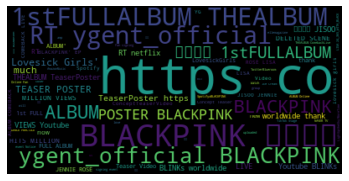

In [283]:
wordcloud = WordCloud().generate(user_1_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

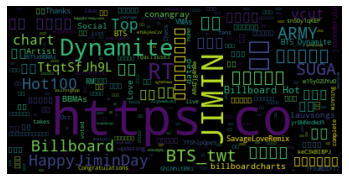

In [306]:
wordcloud = WordCloud().generate(user_2_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

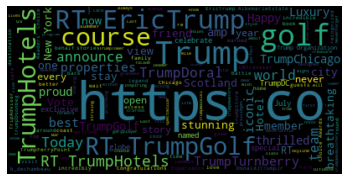

In [307]:
wordcloud = WordCloud().generate(user_3_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

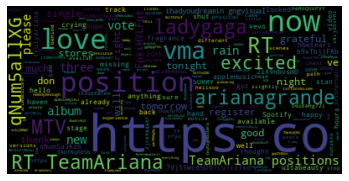

In [309]:
wordcloud = WordCloud().generate(user_4_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

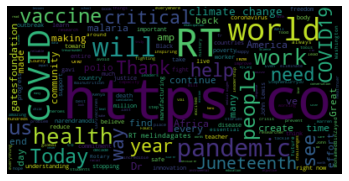

In [310]:
wordcloud = WordCloud().generate(user_5_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Analysis

이번 과제는 지금까지 웹서버를 스크래핑 하면서 배웠던 지식들을 사용해서 트위터를 스크래핑 하여 원하는 키워드가 들어간 데이터를 검색하고 word cloud를 만들고, 또한 원하는 다섯명의 인물의 트위터 계정에서 name, description, 그리고 followers_count같은 유용한 정보를 추출하고 또한 그 계정의 최근 트윗을 스크랩 하여 word cloud를 만들 수 있게 하였다. 
복잡한 JSON파일을 강의에서 배운 json_normalize같은 방법을 통해 정보를 보기쉽게 정리하고 원하는 특정 데이터를 얻을 수 있었다. 또한 TF-IDF를 통하여 어떠한 단어가 특정 데이터에서의 중요도가 얼마인가를 분석, 사용하여 단어들을 배열해놓은 워드 클라우드를 만들 수 있었다.
저번 과제에서 사용한 bar chart, pie chart와 같은 plot이랑은 다르게 word cloud는 단어의 크기, 위치, 배열 등을 통하여 단어의 중요도를 알 수 있게 정확한 수치를 알 수는 없어도 한눈에 중요도의 분포를 알게 해 주는 점에서 흥미로운 plot이었다.
COVID, k-pop등 의 키워드를 포함한 데이터를 수집하고, processing하면서 이렇게 데이터를 다루는 일은 점점 SNS의 기능이 강조되는 사회에서 의료, 문화 등등 어떤 산업에도 꼭 필요한 것 이라는 생각이 들었다. 어느 산업에서나 현 시점의 트렌드, 즉 동향을 파악 하는것이 중요한 일이라고 생각 하는데 이렇게 실시간으로 데이터를 수집하여 분석하면 어떤 산업에서든 동향 파악에 큰 이점이 될 수 있다고 생각한다. 
트위터 뿐 만 아니라 요즘 전 세대에서 많이 사용하는 인스타그램이나 페이스북을 통해서도 비슷한 스크래핑을 진행 할 수 있을 것이라는 생각이 들었다.
또한 관심있는 인물 5명의 트윗을 스크래핑 하면서 이러한 데이터 수집 과정을 통하여 이 인물에 대한 화제나 정보에 대하여 새롭게 알게되는 계기가 되었다.

This lab uses the knowledge learned while scraping the web server so far to search for data with the keywords i want, create a word cloud, extract useful information such as name, description, and followers_count from the Twitter account of the five desired people, and also scrap the latest tweets from the account to create a word cloud.
Methods such as json_normalize, which taught complex JSON files in the lecture, made it easy to organize information and obtain specific data that I wanted. Through TF-IDF, we were also able to create a word cloud that arranged words by analyzing and using what is important to certain data.
Unlike the plot used in the last task, such as bar chart and pie chart, word cloud was an interesting plot in that even though we could not know the exact number of words through the size, location, arrangement, etc., we could know the distribution of importance at a glance.
Collecting and processing data including keywords such as COVID and K-pop, I thought that it was essential for any industry, such as medical care, culture, etc., in a society where the functions of SNS are increasingly emphasized. I think it's important to understand current trends in any industry, but I think collecting and analyzing data in real time can be a great advantage in any industry.
It occurred to me that similar scraping could be carried out not only on Twitter but also on Instagram and Facebook, which are popular among all generations these days.
Scraping the tweets of the five interested people, this data collection process also gave me a chance to learn about the topic or information about the person.